In [1]:
import pandas as pd
import numpy as np

In [2]:
match=pd.read_csv("matches.csv")

In [3]:
dilivery=pd.read_csv("deliveries.csv")

In [4]:
dilivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
match.shape


(756, 18)

In [6]:
total_score=dilivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score=total_score[total_score['inning']==1]

In [8]:
match_df=match.merge(total_score[['match_id','total_runs']],left_on='id',right_on='match_id')

In [9]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
teams=[
    'Sunrisers Hyderabad', 'Mumbai Indians', 
    'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 
        'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals'
]

In [11]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [12]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [13]:
match_df.shape

(610, 20)

In [14]:
match_df=match_df[match_df['dl_applied']==0]

In [15]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [16]:
delivery_df=match_df.merge(dilivery,on='match_id')

In [17]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [18]:
delivery_df['current_score'] = (
    delivery_df.groupby('match_id')['total_runs_y'].cumsum()
)


In [19]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['total_runs_y']+1

In [20]:
delivery_df['ball_left']=126-(delivery_df['over']*6)+delivery_df['ball']

In [21]:
# Replace NaN with 0
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# Convert dismissal info to binary (0 or 1)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(
    lambda x: 0 if x == "0" else 1
)

# Cumulative wickets per match
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

# Remaining wickets
delivery_df['wickets'] = 10 - wickets

# View dataframe
delivery_df.head()



,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,ball_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,121,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,208,122,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,208,123,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,206,124,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,204,125,10


In [22]:
delivery_df['curr']=(delivery_df['current_score']*6)/(120-delivery_df['ball_left'])

In [23]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/(120-delivery_df['ball_left'])

In [24]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [25]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [26]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','ball_left','wickets','total_runs_x','curr','rrr','result']]

In [27]:
final_df=final_df.sample(final_df.shape[0])
final_df.dropna(inplace=True)

In [28]:
final_df.isnull().sum()


batting_team    0
bowling_team    0
city            0
runs_left       0
ball_left       0
wickets         0
total_runs_x    0
curr            0
rrr             0
result          0
dtype: int64

In [29]:
final_df[['curr','rrr']] = final_df[['curr','rrr']].replace([np.inf, -np.inf], np.nan)
final_df.dropna(subset=['curr','rrr'], inplace=True)

In [30]:
import numpy as np

# Replace +inf and -inf with NaN (only for curr & rrr)
delivery_df[['curr', 'rrr']] = delivery_df[['curr', 'rrr']].replace(
    [np.inf, -np.inf], np.nan
)

# Drop rows where curr or rrr is NaN (in-place)
delivery_df.dropna(subset=['curr', 'rrr'], inplace=True)

# Optional: reset index
delivery_df.reset_index(drop=True, inplace=True)


In [31]:
final_df.describe()

,runs_left,ball_left,wickets,total_runs_x,curr,rrr,result
count,67361.000000,67361.000000,67361.000000,67361.000000,67361.000000,67361.000000,67361.000000
mean,165.552219,69.460251,7.523716,165.860394,9.165749,22.579804,0.536898
std,29.637005,33.257010,2.140113,29.699477,9.960681,169.848097,0.498640
min,60.000000,7.000000,0.000000,65.000000,-216.000000,-1500.000000,0.000000
25%,146.000000,42.000000,6.000000,146.000000,7.200000,11.567010,0.000000
50%,165.000000,70.000000,8.000000,165.000000,8.647059,17.478261,1.000000
75%,185.000000,98.000000,9.000000,186.000000,10.400000,34.695652,1.000000
max,251.000000,129.000000,10.000000,250.000000,210.000000,1500.000000,1.000000


In [32]:
from sklearn.model_selection import train_test_split 

In [33]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2,random_state=1)

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([('trf',OneHotEncoder(
    sparse_output=False, drop='first'),['batting_team','bowling_team','city'])
                      ],remainder='passthrough')

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [36]:
final_df.describe()

,runs_left,ball_left,wickets,total_runs_x,curr,rrr,result
count,67361.000000,67361.000000,67361.000000,67361.000000,67361.000000,67361.000000,67361.000000
mean,165.552219,69.460251,7.523716,165.860394,9.165749,22.579804,0.536898
std,29.637005,33.257010,2.140113,29.699477,9.960681,169.848097,0.498640
min,60.000000,7.000000,0.000000,65.000000,-216.000000,-1500.000000,0.000000
25%,146.000000,42.000000,6.000000,146.000000,7.200000,11.567010,0.000000
50%,165.000000,70.000000,8.000000,165.000000,8.647059,17.478261,1.000000
75%,185.000000,98.000000,9.000000,186.000000,10.400000,34.695652,1.000000
max,251.000000,129.000000,10.000000,250.000000,210.000000,1500.000000,1.000000


In [37]:
pipe.fit(x_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [38]:
y_pred=pipe.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9985897721368663

In [40]:
pipe.predict_proba(x_test)[1]

array([1., 0.])

In [41]:

def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [42]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','ball_left','wickets','total_runs_x','curr','rrr']].dropna()
    temp_df = temp_df[temp_df['ball_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    


In [43]:
delivery_df.describe()

,match_id,total_runs_x,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,...,extra_runs,total_runs_y,player_dismissed,current_score,runs_left,ball_left,wickets,curr,rrr,result
count,68186.000000,68186.000000,68186.0,68186.000000,68186.000000,68186.0,68186.000000,68186.000000,68186.000000,68186.000000,...,68186.000000,68186.000000,68186.000000,68186.000000,68186.000000,68186.000000,68186.000000,68186.000000,68186.000000,68186.000000
mean,2180.943273,165.665782,2.0,10.023333,3.587261,0.0,0.036782,0.004869,0.021427,0.004004,...,0.067228,1.307292,0.048705,73.851230,165.358490,69.447262,7.521793,9.148963,22.520910,0.537119
std,3795.920229,29.685870,0.0,5.535862,1.800122,0.0,0.246103,0.120519,0.200084,0.072653,...,0.344619,1.604607,0.215252,46.903162,29.622892,33.260738,2.139027,9.947169,169.707456,0.498624
min,1.000000,65.000000,2.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,60.000000,7.000000,0.000000,-216.000000,-1500.000000,0.000000
25%,200.000000,146.000000,2.0,5.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,35.000000,146.000000,42.000000,6.000000,7.186047,11.552239,0.000000
50%,416.000000,165.000000,2.0,10.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,70.000000,165.000000,70.000000,8.000000,8.636364,17.446154,1.000000
75%,580.000000,185.000000,2.0,15.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,109.000000,185.000000,98.000000,9.000000,10.388060,34.650000,1.000000
max,11415.000000,250.000000,2.0,20.000000,9.000000,0.0,5.000000,4.000000,5.000000,5.000000,...,7.000000,10.000000,1.000000,223.000000,251.000000,129.000000,10.000000,210.000000,1500.000000,1.000000


In [44]:

temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
4762,1,0,0,98.0,2.0
4775,2,-1,0,88.0,12.0
4781,3,0,1,93.0,7.0
4787,4,4,0,98.0,2.0
4793,5,2,0,96.0,4.0
4799,6,-5,0,97.0,3.0
4807,7,0,0,97.0,3.0
4813,8,-1,0,99.0,1.0
4820,9,1,0,96.0,4.0
4826,10,-1,1,91.0,9.0


Text(0.5, 1.0, 'Target-178')

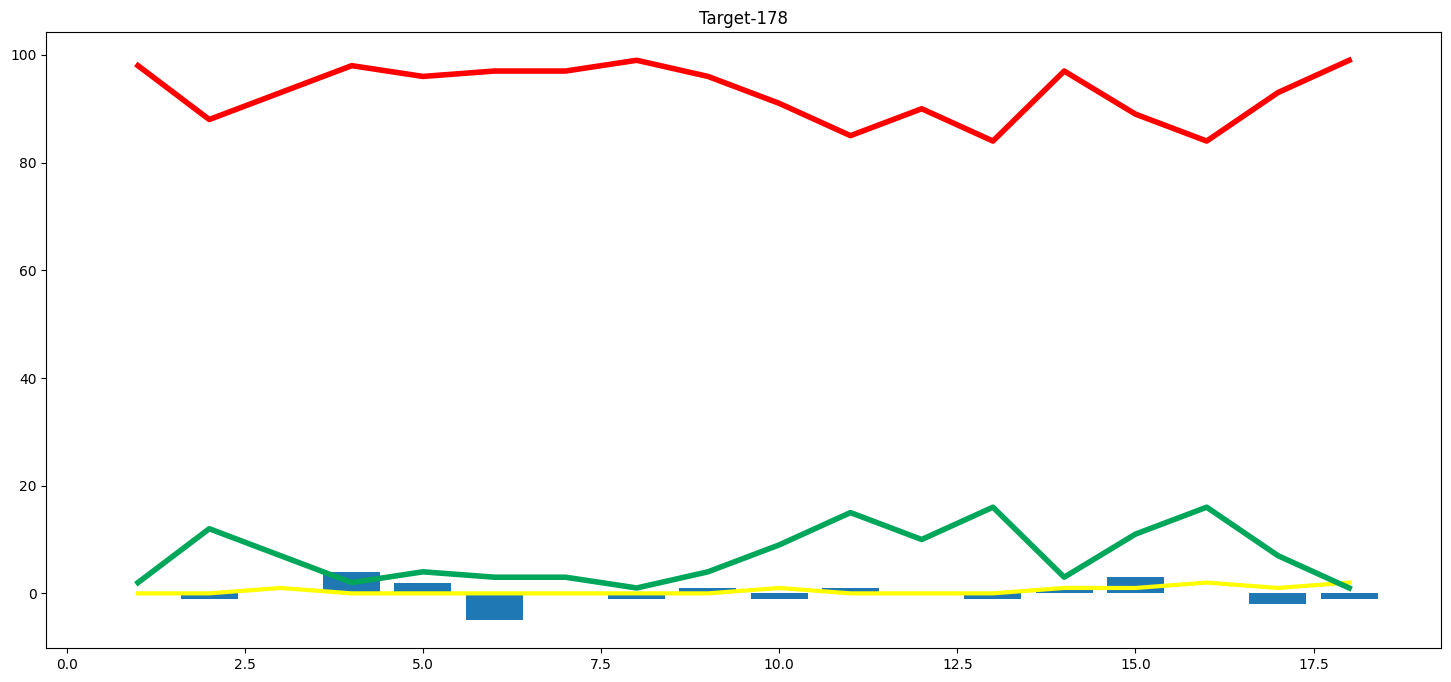

In [45]:

import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [46]:

delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [47]:
import pickle
pickle.dump(pipe,open('model.pkl','wb'))
